In [15]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas
import os
from scipy.stats import expon, poisson
% matplotlib inline



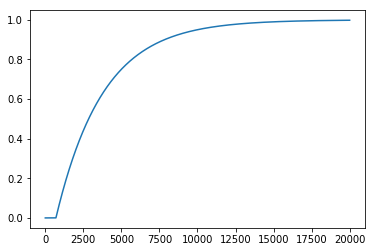

In [69]:
loc = 698
scale = 3100
plt.plot(expon.cdf(range(0, 20000), loc=loc, scale = scale))

In [70]:
model_tiles = [expon.cdf(q,loc=loc, scale=scale) for q in  [698, 1577.75, 3433, 4503, 4507]]
model_tiles
# We've chosen parameters which makes P(L< Q1) as close as possible to 0.25
# Important to notice is that for each remaining percentile Q, P(L < Q) is less than its true value. 
# This means that P(L > Q) is greater than its true value, so the model distribution favours longer lengths more than the true distribution
# Then if the generation episode lengths under the model are shorter than those observed, 
# we can expect the generation episode lengths in the real experiment to exhibit warping in the real experiment

[0.0,
 0.24707550057765892,
 0.58615263822963526,
 0.70695214476034063,
 0.70733002717762905]

In [125]:
n_workers = 720
len_lists = [expon(loc = loc,scale=scale).rvs(size=20) for _ in range(n_workers)]
cum_len_lists = [[sum(ll[:i])for i in range(1,len(ll)+1)] for ll in len_lists]
len_submit_pairs = []
for cll, ll in zip(cum_len_lists, len_lists):
    len_submit_pairs += zip(cll, ll)


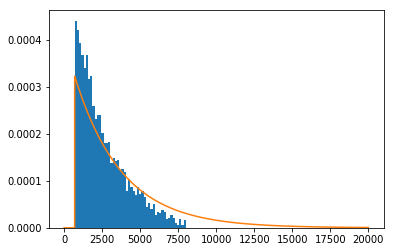

In [126]:
gen_size = 5000
gen_pairs = sorted(len_submit_pairs, key=lambda x: x[0])[:5000]
gen_t_end = gen_pairs[-1][0]
assert gen_t_end < min([cll[-1] for cll in cum_len_lists])
gen_lens_gen = map(lambda x: x[1], sorted_pairs[:gen_size])
gen_lens = [gl for gl in gen_lens_gen]
plt.hist(gen_lens, bins=50, normed=True);
plt.plot(expon.pdf(range(0, 20000), loc=loc, scale = scale))